<a href="https://colab.research.google.com/github/kaorisugi/diveintocode-ml/blob/master/sprint17_fastrcnn_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# sprint17 公開されている実装を動かす
READMEを参考に上記実装を動かしてください。 
Faster R-CNN[1]の実装を動かします。

[1]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99

https://arxiv.org/pdf/1506.01497.pdf

以下のものを使用してください。Kerasを使用した実装です。

duckrabbits/ObjectDetection at master

## 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。 



### ObjectDetection(上記GitHub　READMEより)
Kerasを利用したFaster R-CNN実装により物体検出を行います。

データセットの用意
Kaggleからダウンロードしたthe-simpsons-characters-dataset.zipを解凍します。
simpsons_dataset.zipを解凍します。
解凍したsimpsons_datasetフォルダをプロジェクトフォルダ配下に格納します。
annotation.txtもプロジェクトフォルダ配下に格納します。 （kaggleからダウンロードしたannotation.txtではなく、ここにあるannotation.txtを使いましょう）

### 学習

以下のコマンドを実行してください。

python train.py -p annotation.txt

以下のように設定ファイルのパスが出力されるので記録してください。推定時に使います。

""" path to config file : ./save/train_20190309-220050_config.pickle """

エポック数なども引数で変更できます。詳細はtrain.pyを参照してください。

### ➡︎GoogleColab上で実行。設定ファイルのファイル名画像を添付します。


### 推定

以下のコマンドを実行してください。

python predict.py -i [推定したい画像を入れたディレクトリのパス] -c [学習時に保存された設定ファイルのパス]

### ➡︎推定画像のスクリーンショットを添付します。

##### Googole　colabによる学習、推定

In [0]:
#kaggle　のシンプソンズデータセットをインストール
!pip install kaggle

In [0]:
ls -a

In [0]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {'username':'kaorisugi','key':'45dfd98b8e531a606d8922234e841c6d'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [0]:
# simpsonデータセットのAPIcommandを叩いてデータセットをダウンロードする
# APIcommandはこちらのサイトに。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

!unzip /content/the-simpsons-characters-dataset.zip  -d Simpsons
# train用のデータセットを解凍

!unzip /content/Simpsons/simpsons_dataset.zip

In [0]:
!unzip /content/the-simpsons-characters-dataset.zip  -d Simpsons

In [0]:
# train用のデータセットを解凍

!unzip /content/Simpsons/simpsons_dataset.zip

In [0]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

In [0]:
import os

os.chdir('/content/ObjectDetection')
print(os.getcwd())


In [0]:
# この後、githubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

In [0]:
! python train.py -p annotation.txt

In [0]:
# 修正箇所
# tf ==> channels_last
# K.image_dim_ordering() ==> K.image_data_format
# 修正済みのmodel内フォルダ、train,predictファイルをローカルからobjectDetectionにアップロード
#　下記を実行し、適した場所に移動させる

In [0]:
! python train.py -p annotation.txt
! python predict.py -i /content/ObjectDetection/kaggle_simpson_testset -c ./save/train_20190917-071651_config.pickle
!cp -r /content/ObjectDetection/output /content/drive/'My Drive'/'Colab Notebooks'/DIVE/kadai/sprint17
! mv /content/ObjectDetection /content/drive/'My Drive'/'Colab Notebooks'/DIVE/kadai/sprint17

## 論文を読んで重要だと考えた部分

１）RPN：計算速度のボトルネックとなっていた、領域提案の計算を高速化するのがRPN<br>
２）RoIプーリング層：計算コストを効率化するため、RPNとRーCNN間で畳み込み層を共有。そのために、RoIプーリング層で様々なサイズの提案領域を固定サイズにして出力している<br>
3）IOU：提案領域を決めるためにグランドトゥルースとアンカーの重なりであるIOUを算出している

## コード内に##で１、２、３に関連する箇所についてのコメントを書き込みました

## ObjectDetection のpython train.py

In [0]:
from __future__ import division

import os
import sys
import time
import argparse
from datetime import datetime

import numpy as np

import pickle

from model import faster_rcnn
##1)RPN:faster_rcnn.py内のmodelをimportしている

from model import config, data_generators

from model.parser import get_data
import model.roi_helpers as roi_helpers
##2)Poiプーリング：roi_helpers.py内のmodelをimportしている

from keras import backend as K
from keras.utils import generic_utils

sys.setrecursionlimit(10000)

parser = argparse.ArgumentParser(formatter_class=argparse.RawTextHelpFormatter, description='Object Detection')
parser.add_argument("-p", "--path", default=None, help="path to annotation file")
parser.add_argument("--save_dir", default="./save", help="path to save directory")
parser.add_argument('--n_epochs', default=10, type=int, metavar='N',
                    help='number of epochs')
parser.add_argument('--n_iters', default=100, type=int, metavar='N',
                    help='number of iterations')
parser.add_argument('--horizontal_flips', action='store_true',
                    help='augument with horizontal flips (Default:False)')
parser.add_argument('--vertical_flips', action='store_true',
                    help='augument with horizontal flips (Default:False)')
parser.add_argument('--rot_90', action='store_true',
                    help='augument with 90 degree rotations (Default:False)')

def main():
    args = parser.parse_args()
    time_stamp = "{0:%Y%m%d-%H%M%S}".format(datetime.now())
    save_name = os.path.join(args.save_dir, "train_{}".format(time_stamp))

    if not(os.path.isdir(args.save_dir)):
        os.makedirs(args.save_dir)
    if args.path == None:
        raise OSError("path to annotation file must be required.")
    C = config.Config()
    C.config_filename = save_name + "_config.pickle"
    C.model_path = save_name + "_model.hdf5"
    C.use_horizontal_flips = bool(args.horizontal_flips)
    C.use_vertical_flips = bool(args.vertical_flips)
    C.rot_90 = bool(args.rot_90)
    all_imgs, classes_count, class_mapping = get_data(args.path)
    C.class_mapping = class_mapping

    with open(C.config_filename, 'wb') as config_f:
        pickle.dump(C,config_f)
        print("-------------------------------")
        print('path to config file : {}'.format(C.config_filename))
        print("-------------------------------")

    train_imgs = [s for s in all_imgs if s['imageset'] == 'trainval']
    val_imgs = [s for s in all_imgs if s['imageset'] == 'test']

    data_gen_train = data_generators.get_anchor_gt(train_imgs, classes_count, C, K.image_dim_ordering(), mode='train')
    data_gen_val = data_generators.get_anchor_gt(val_imgs, classes_count, C, K.image_dim_ordering(), mode='val')

    model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)

    ## 1)RPN:faster_rcnn.pyからmodel_rpnをget_modelしている
    
    
    losses = np.zeros((args.n_iters, 5))
    rpn_accuracy_rpn_monitor, rpn_accuracy_for_epoch = [], []

    best_loss = np.Inf

    with open('out.csv', 'w') as f:
        f.write('Accuracy,RPN classifier,RPN regression,Detector classifier,Detector regression,Total')
        f.write('\t')

    iter_num = 0

    t0 = start_time = time.time()
    try:
        for epoch_num in range(args.n_epochs):
            progbar = generic_utils.Progbar(args.n_iters)
            print('Epoch {}/{}'.format(epoch_num + 1, args.n_epochs))

            while True:
                try:
                    if len(rpn_accuracy_rpn_monitor) == args.n_iters and C.verbose:
                        mean_overlapping_bboxes = float(sum(rpn_accuracy_rpn_monitor))/len(rpn_accuracy_rpn_monitor)
                        rpn_accuracy_rpn_monitor = []
                        print('Average number of overlapping bounding boxes from RPN = {} for {} previous iterations'.format(mean_overlapping_bboxes, args.n_iters))
                        if mean_overlapping_bboxes == 0:
                            print('RPN is not producing bounding boxes that overlap the ground truth boxes. Check RPN settings or keep training.')
                    X, Y, img_data = next(data_gen_train)
                    loss_rpn = model_rpn.train_on_batch(X, Y)
                    P_rpn = model_rpn.predict_on_batch(X)
                    R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, K.image_dim_ordering(), use_regr=True, overlap_thresh=0.7, max_boxes=300)

                    ## 2)RPNモデルの学習、推定を行い、Roiプーリングに送っている 
                    ## 3)しきい値を0.７と定め、iouを算出している。提案領域ボックスのマックス数を３００と決めている。
                    
                    # note: calc_iou converts from (x1,y1,x2,y2) to (x,y,w,h) format
                    X2, Y1, Y2 = roi_helpers.calc_iou(R, img_data, C, class_mapping)
                    


                    neg_samples = np.where(Y1[0, :, -1] == 1)
                    pos_samples = np.where(Y1[0, :, -1] == 0)
                    if len(neg_samples) > 0:
                        neg_samples = neg_samples[0]
                    else:
                        neg_samples = []

                    if len(pos_samples) > 0:
                        pos_samples = pos_samples[0]
                    else:
                        pos_samples = []

                    rpn_accuracy_rpn_monitor.append(len(pos_samples))
                    rpn_accuracy_for_epoch.append((len(pos_samples)))
                    if len(pos_samples) < C.num_rois//2:
                        selected_pos_samples = pos_samples.tolist()
                    else:
                        selected_pos_samples = np.random.choice(pos_samples, C.num_rois//2, replace=False).tolist()
                    try:
                        selected_neg_samples = np.random.choice(neg_samples, C.num_rois - len(selected_pos_samples), replace=False).tolist()
                    except:
                        selected_neg_samples = np.random.choice(neg_samples, C.num_rois - len(selected_pos_samples), replace=True).tolist()

                    sel_samples = selected_pos_samples + selected_neg_samples

                    loss_class = model_classifier.train_on_batch([X, X2[:, sel_samples, :]], [Y1[:, sel_samples, :], Y2[:, sel_samples, :]])

                    if iter_num == args.n_iters:
                        loss_rpn_cls = np.mean(losses[:, 0])
                        loss_rpn_regr = np.mean(losses[:, 1])
                        loss_class_cls = np.mean(losses[:, 2])
                        loss_class_regr = np.mean(losses[:, 3])
                        class_acc = np.mean(losses[:, 4])

                        mean_overlapping_bboxes = float(sum(rpn_accuracy_for_epoch)) / len(rpn_accuracy_for_epoch)
                        rpn_accuracy_for_epoch = []

                        if C.verbose:
                            print('Mean number of bounding boxes from RPN overlapping ground truth boxes: {}'.format(mean_overlapping_bboxes))
                            print('Classifier accuracy for bounding boxes from RPN: {}'.format(class_acc))
                            print('Loss RPN classifier: {}'.format(loss_rpn_cls))
                            print('Loss RPN regression: {}'.format(loss_rpn_regr))
                            print('Loss Detector classifier: {}'.format(loss_class_cls))
                            print('Loss Detector regression: {}'.format(loss_class_regr))
                            print('Elapsed time: {}[s]'.format(time.time() - start_time))

                        target_text_file = open('out.csv', 'a')
                        target_text_file.write('{},{},{},{},{},{}'.format(class_acc, loss_rpn_cls,
                                                loss_rpn_regr, loss_class_cls, loss_class_regr,
                                                loss_rpn_cls + loss_rpn_regr + loss_class_cls + loss_class_regr))
                        target_text_file.write('\t')

                        curr_loss = loss_rpn_cls + loss_rpn_regr + loss_class_cls + loss_class_regr
                        iter_num = 0
                        start_time = time.time()

                        if curr_loss < best_loss:
                            if C.verbose:
                                print('Total loss decreased from {} to {}, saving weights'.format(best_loss,curr_loss))
                            best_loss = curr_loss
                            model_all.save_weights(C.model_path)
                        break

                    losses[iter_num, 0] = loss_rpn[1]
                    losses[iter_num, 1] = loss_rpn[2]
                    losses[iter_num, 2] = loss_class[1]
                    losses[iter_num, 3] = loss_class[2]
                    losses[iter_num, 4] = loss_class[3]
                    iter_num += 1

                    progbar.update(iter_num, [('rpn_cls', np.mean(losses[:iter_num, 0])), ('rpn_regr', np.mean(losses[:iter_num, 1])),
                                              ('detector_cls', np.mean(losses[:iter_num, 2])), ('detector_regr', np.mean(losses[:iter_num, 3]))])

                except Exception as e:
                    print('Exception: {}'.format(e))
                    continue

    except KeyboardInterrupt:
        t1 = time.time()
        print('\nIt took {:.2f}s'.format(t1-t0))
        sys.exit('Keyboard Interrupt')

    print("training is done")
    print("-------------------------------")
    print('path to config file : {}'.format(C.config_filename))
    print("-------------------------------")

if __name__ == '__main__':
    main()

# 3.YOLOv3
シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。

qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)

[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement

https://pjreddie.com/media/files/papers/YOLOv3.pdf

## 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。

まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。

出力結果を課題の一部として提出してください。

In [3]:
!pwd

/content


In [2]:
# keras-YOLOをクローン
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 150.95 KiB | 10.06 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [4]:
#keras-YOLOに移動
%cd /content/keras-yolo3

/content/keras-yolo3


In [5]:
# yolov3weightのダウンロード（学習済みの重み）
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-10-30 09:09:31--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  91.2MB/s    in 2.6s    

2019-10-30 09:09:34 (91.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
#事前学習済みの重みをロード
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

In [9]:
!pwd
!mv "/content/test_image.jpg" "/content/keras-yolo3"

/content/keras-yolo3


In [14]:
#yoloを実行してみる
!python yolo_video.py --image 

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2019-10-30 09:21:58.778107: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-10-30 09:21:58.778417: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x26b9640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-10-30 09:21:58.778483: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-10-30 09:21:58.780856: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-10-30 09:21:58.851473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-10-30 09:21:58.852313: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x63

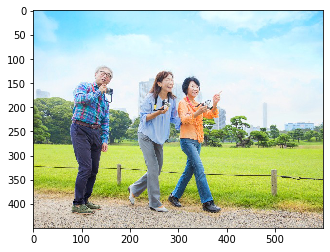

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#input_image
im = Image.open("test_image.jpg")
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

人を検出できていた

## 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。

アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。
《アノテーションファイルの形式》
image_file_path,xmin,ymin,xmax,ymax,label

In [23]:
#simpsonの画像データをYOLOへ移動
!mv /content/Simpsons/simpsons_dataset/simpsons_dataset /content/keras-yolo3

mv: cannot stat '/content/Simpsons/simpsons_dataset/simpsons_dataset': No such file or directory


In [0]:
!mv "/content/drive/My Drive/Colab Notebooks/DIVE/kadai/sprint17/sprint19" "/content/drive/My Drive/Colab Notebooks/DIVE/kadai"